In [18]:
%reload_ext autoreload
%autoreload 2
from itertools import chain
from os import listdir
from collections import defaultdict
from nonparametric_regression import NonParametricRegression
from preprocessing import bag_of_words
from sklearn.metrics import f1_score, mean_squared_error
import nonparametric_regression as nr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

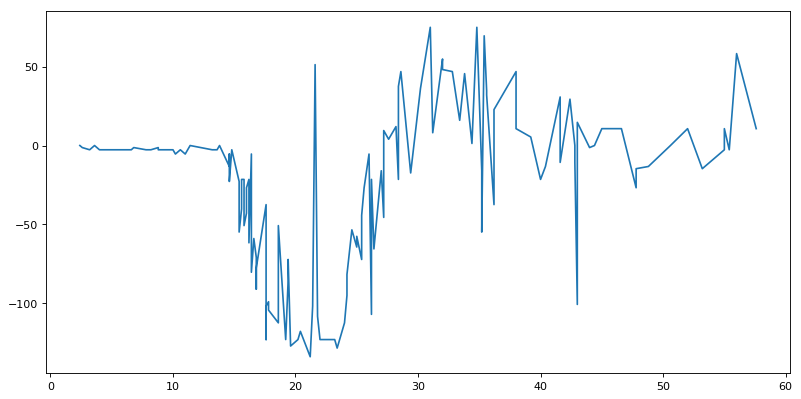

In [5]:
df = pd.read_csv('non-parametric.csv', sep=';')
x, y = df.x, df.y
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y)
plt.show()

MSE for k = 5: 26.652958908787802
MSE for k = 10: 27.60414827845099
MSE for k = 15: 29.3143396454078
MSE for k = 20: 32.33118597560543


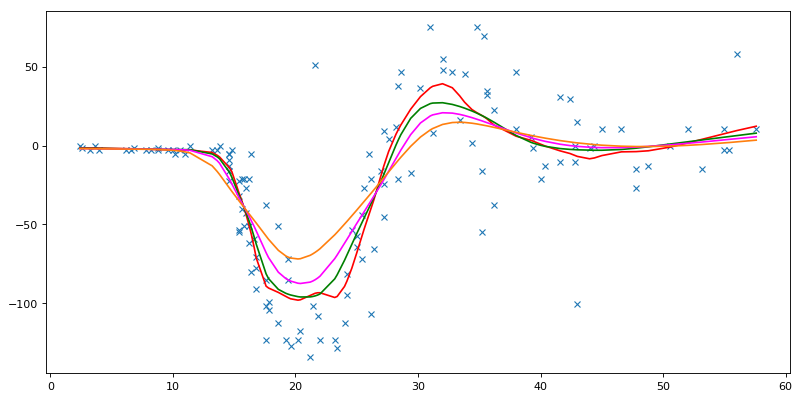

In [50]:
reg = NonParametricRegression()
ks = [5,10,15,20]
params = [{'method': 'ks', 'metric': nr.l2_norm, 'k' : k} for k in ks]
reg = []
for p in params:
    p['kernel'] = nr.gaussian_kernel
    reg.append([NonParametricRegression(p), None])
    reg[-1][1] = reg[-1][0].train(np.array(x), np.array(y))
    print('MSE for k = {}: {}'.format(p['k'], np.sqrt(mean_squared_error(reg[-1][1], y))))
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, 'x', x, reg[0][1], 'r', x, reg[1][1], 'g', x, reg[2][1], 'magenta', x, reg[3][1])
plt.show()
#Гауссово ядро

MSE for k = 5: 24.933176258390482
MSE for k = 10: 25.992673683598102
MSE for k = 15: 26.71118740641019
MSE for k = 20: 27.075058436918965


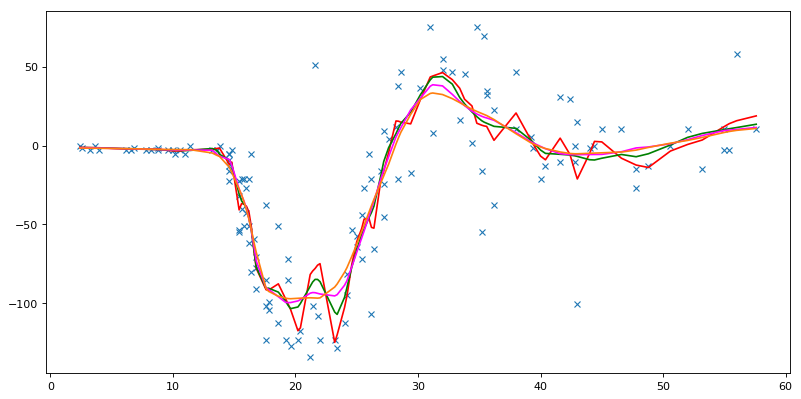

In [51]:
reg = NonParametricRegression()
ks = [5,10,15,20]
params = [{'method': 'ks', 'metric': nr.l2_norm, 'k' : k} for k in ks]
reg = []
for p in params:
    p['kernel'] = nr.quadratic_kernel
    reg.append([NonParametricRegression(p), None])
    reg[-1][1] = reg[-1][0].train(np.array(x), np.array(y))
    print('MSE for k = {}: {}'.format(p['k'], np.sqrt(mean_squared_error(reg[-1][1], y))))
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, 'x', x, reg[0][1], 'r', x, reg[1][1], 'g', x, reg[2][1], 'magenta', x, reg[3][1])
plt.show()


#Квартическое ядро

MSE for k = 10: 27.236225739512548
MSE for k = 15: 28.55873841603174
MSE for k = 20: 31.392007789174382
MSE for k = 25: 33.89311713930203


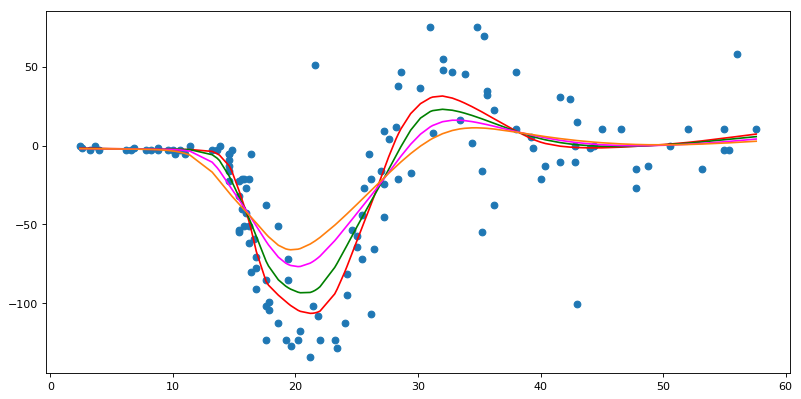

In [56]:
reg = NonParametricRegression()
ks = [10,15,20,25]
params = [{'method': 'lowess', 'metric': nr.l2_norm, 'k' : k} for k in ks]
reg = []
for p in params:
    p['kernel'] = nr.gaussian_kernel
    reg.append([NonParametricRegression(p), None])
    reg[-1][1] = reg[-1][0].train(np.array(x), np.array(y))
    print('MSE for k = {}: {}'.format(p['k'], np.sqrt(mean_squared_error(reg[-1][1], y))))
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, 'o', x, reg[0][1], 'r', x, reg[1][1], 'g', x, reg[2][1], 'magenta', x, reg[3][1])
plt.show()

#Треугольное ядро
